In [7]:
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [35]:
from importlib import reload

In [24]:

########################################

import math
from typing import NamedTuple, List, Tuple, Dict, Any

import pysam
import numpy as np

rng = np.random.default_rng()
# import scipy.stats

from numpy.typing import NDArray
# import pandas as pd

import tqdm
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["svg.fonttype"] = 'none'

# import array
import gzip
import io
import sys
from argparse import ArgumentParser
import re
import random
import json
import itertools

# import pdb


#######

from src.config import *
from src.utils import *

from src.coverage import MyFastaFile, MyAlignmentFile, Quality
# from src.figures import *
from src.quality import *
from src.pangene import *
# from src.sampling import *
from src.summary import *
from src.updateBinning import *

from src.mt import *
from src.lambdaDNA import *
from src.plastid import *

#############################
#### config parameters
#############################


# data exported to Jinja
# data = {}
# config_params()
def config_params_further():
        
    SAMPLE = re.search(r'/?([^/\.]+)\.?[^/]*$', params['bamfile']).groups()[0]
    # print(SAMPLE)
    data['SAMPLE'] = SAMPLE

    # nuclear bin size 
    a, b = prefixBpSize(params['binSize'])
    if a - np.ceil(a) < 1e-6:
        data['bin_size'] = f'{int(a)} {b}'
    else:
        data['bin_size'] = f'{a} {b}'
    data['bin_size']

    fa = MyFastaFile(params['fafile'])
    params['fa'] = fa

    reference_length = fa.get_reference_length
    params['reference_length'] = reference_length

    # chrs to sample and compt
    chrs_valid = params['testchrs'].split(',')
    # lengths of chrs
    lens_valid = [reference_length(chr) for chr in chrs_valid]
    params['chrs_valid'] = chrs_valid
    params['lens_valid'] = lens_valid

    chr_lambda = params['chr_lambda']
    bins_lambda = params['bins_lambda']
    chr_MT = params['chr_MT']

    binSize_lambda = getBins(reference_length(chr_lambda), bins_lambda)
    binSize_MT = getBins(reference_length(chr_MT), bins_lambda)
    binSizeContig = {chr_lambda: binSize_lambda[0], chr_MT: binSize_MT[0]}
    binsContig = {chr_lambda: binSize_lambda[1], chr_MT: binSize_MT[1]}
    chrs_alias = {'lambda': chr_lambda, 'MT': chr_MT}

    params['binSize_lambda'] = binSize_lambda
    params['binSize_MT'] = binSize_MT
    params['binSizeContig'] = binSizeContig
    params['binsContig'] = binsContig
    params['chrs_alias'] = chrs_alias
    
    bam = MyAlignmentFile(params['bamfile'], 'rb')
    params['bam'] = bam

    # classes
    # ('chr1', 23) -> BinCov()
    dict_binning = dict()
    params['dict_binning'] = dict_binning

    # 'XXCGXX' -> KmerCov()
    dict_cgkmer = dict()
    params['dict_cgkmer'] = dict_cgkmer

    # quality stats
    quality = Quality()
    params['quality'] = quality

    params['reads_to_sample'] = min([params['reads_to_sample'], bam.mapped])
    

#######################################
#### summarization and plots
#######################################

config_params_further()

# DNA content
compt_DNA_content()

# # base and read quality
# compt_quality()
# plot_read_length()
# plot_base_quality()
# plot_read_map_quality()
# plot_bar_base_cigar()

# # pangene
# pangene_sampling()
# pangene_compt_plot_meth()

# # MT
# compt_MT()
# if data['mt_is_covered'] == 1:
#     plot_mt_depth_binning()
#     plot_mt_base_error_rate()

# # lambda
# compt_lambda()
# if data['lambda_is_covered'] == 1:
#     plot_lambda_depth_binning()
#     plot_lambda_base_error_rate()

# # plastid
# compt_plastid()
# if data['plastid_is_covered'] == 1:
#     plot_plastid_depth_binning()
#     plot_plastid_base_error_rate()


# print(params)
print(data)


{'SAMPLE': 'ENCFF873NOV', 'bin_size': '100 Kbp', 'lambda_DNA_content_vs_nuclear': '0.2145', 'lambda_DNA_content_vs_MT': '38', 'MT_is_covered': 1, 'mt_nCorG': '7,350', 'mt_covnCorG': '7,133', 'mt_covnCorG_prop': '97.05', 'mt_length': '16,568', 'mt_covn': '16,568', 'mt_cov_prop': '100', 'mt_bin_size': '20', 'mt_median_dp': '4.195e+04', 'mt_mean_dp': '4.592e+04', 'mt_me': '0.009847', 'bsrate_mt': '99.02', 'err_rate_mt': '7.03', 'mt_is_covered': 1, 'dict_lambda': <src.coverage.CovLambda object at 0x7f0ab0280da0>, 'lambda_is_covered': 1, 'lambda_nCorG': '24,182', 'lambda_covnCorG': '24,182', 'lambda_covnCorG_prop': '100', 'lambda_length': '48,502', 'lambda_covn': '48,502', 'lambda_cov_prop': '100', 'lambda_size': '50', 'lambda_median_dp': '3685', 'lambda_mean_dp': '5945', 'bsrate_lambda': '99.01', 'err_rate_lambda': '15.61'}


In [15]:
from src.bin_chr_wise import *
from src.whole_genome import *

In [16]:
config_params_further()

In [18]:
compt_MT()

100%|██████████| 4/4 [02:32<00:00, 38.00s/it]


In [ ]:
if data['mt_is_covered'] == 1:
    plot_mt_depth_binning()
    plot_mt_base_error_rate()


In [30]:

import src.lambdaDNA

In [43]:
import src.plastid
reload(src.plastid)

<module 'src.plastid' from '/root/bsDoctor/src/plastid.py'>

In [39]:
# lambda
src.lambdaDNA.compt_lambda()

100%|██████████| 10/10 [00:54<00:00,  5.44s/it]


In [ ]:
if data['lambda_is_covered'] == 1:
    plot_lambda_depth_binning()
    plot_lambda_base_error_rate()

In [44]:
# plastid
src.plastid.compt_plastid()
if data['plastid_is_covered'] == 1:
    plot_plastid_depth_binning()
    plot_plastid_base_error_rate()


In [179]:
import src.bin_chr_wise

reload(src.bin_chr_wise)

<module 'src.bin_chr_wise' from '/root/bsDoctor/src/bin_chr_wise.py'>

In [158]:
src.bin_chr_wise.compt_chr_and_bin_wise()

In [236]:
import src.utils
import src.whole_genome

reload(src.whole_genome)
reload(src.utils)

<module 'src.utils' from '/root/bsDoctor/src/utils.py'>

In [237]:
# nuclear whole-genome
src.whole_genome.compt_whole_genome()

In [238]:
import src.saturation_curve_and_DNA_lost
reload(src.saturation_curve_and_DNA_lost)


<module 'src.saturation_curve_and_DNA_lost' from '/root/bsDoctor/src/saturation_curve_and_DNA_lost.py'>

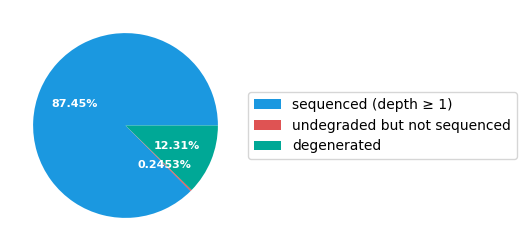

In [240]:
src.saturation_curve_and_DNA_lost.compt_plot_DNA_composition()

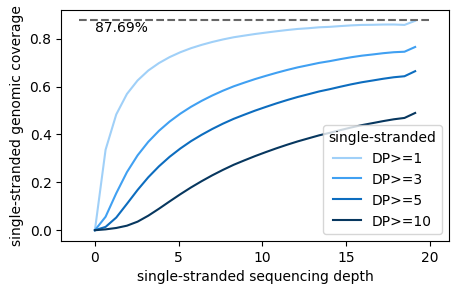

In [239]:
src.saturation_curve_and_DNA_lost.plot_saturation_curve()

In [2]:
import numpy as np

In [3]:
GEN = np.random.Generator(np.random.PCG64())